#### En primer lugar importamos las librerias necesarias para realizar el proyecto.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#### Usando la libreria pandas leeremos el archivo correspondiente.

###### Podemos ver que en el dataset el ID podria funcionar como indice asi que usamos el argumento index_col ='ID'.

In [2]:
DF = pd.read_excel('E-Commerce_train.xlsx', index_col= 'ID')
DF.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,D,Flight,4,2,177,3,low,F,44,1233,1
2,F,Flight,4,5,216,2,low,M,59,3088,1
3,A,Flight,2,2,183,4,low,M,48,3374,1
4,B,Flight,3,3,176,4,medium,M,10,1177,1
5,C,Flight,2,2,184,3,medium,F,46,2484,1


Corroboramos que la cantidad de filas y columnas correspondan con los insinuados en la consigna (8999 observaciones y 12 dimensiones)

In [3]:
DF.shape
#Tenemos 11 dimensiones porque el ID en nuestro caso es el indice

(8999, 11)

Es de importancia saber que tipo de dato tienen cada una de las columnas:

In [4]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8999 entries, 1 to 8999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      8999 non-null   object
 1   Mode_of_Shipment     8999 non-null   object
 2   Customer_care_calls  8999 non-null   int64 
 3   Customer_rating      8999 non-null   int64 
 4   Cost_of_the_Product  8999 non-null   int64 
 5   Prior_purchases      8999 non-null   int64 
 6   Product_importance   8999 non-null   object
 7   Gender               8999 non-null   object
 8   Discount_offered     8999 non-null   int64 
 9   Weight_in_gms        8999 non-null   int64 
 10  Reached.on.Time_Y.N  8999 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 843.7+ KB


Podemos ver que 4 variables son de tipo object, y el resto son de tipo int64, vamos a normalizar los datos a tipo int en estas 4 varibles, que siendo categoricas tendran un numero asignado segun la cantidad de categorias que se encuentren.

In [5]:
from sklearn.preprocessing import LabelEncoder
for col in DF.columns:
  if(DF[col].dtype == 'object'):
      le=LabelEncoder()
      DF[col]=le.fit_transform(DF[col])

In [6]:
#Corroboramos que sea efectiva la idea:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8999 entries, 1 to 8999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Warehouse_block      8999 non-null   int32
 1   Mode_of_Shipment     8999 non-null   int32
 2   Customer_care_calls  8999 non-null   int64
 3   Customer_rating      8999 non-null   int64
 4   Cost_of_the_Product  8999 non-null   int64
 5   Prior_purchases      8999 non-null   int64
 6   Product_importance   8999 non-null   int32
 7   Gender               8999 non-null   int32
 8   Discount_offered     8999 non-null   int64
 9   Weight_in_gms        8999 non-null   int64
 10  Reached.on.Time_Y.N  8999 non-null   int64
dtypes: int32(4), int64(7)
memory usage: 703.0 KB


In [7]:
DF.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,3,0,4,2,177,3,1,0,44,1233,1
2,4,0,4,5,216,2,1,1,59,3088,1
3,0,0,2,2,183,4,1,1,48,3374,1
4,1,0,3,3,176,4,2,1,10,1177,1
5,2,0,2,2,184,3,2,0,46,2484,1


Continuando con el analisis exploratorio es importante tomar dimension de los datos NaN que pueden contener nuestras variables

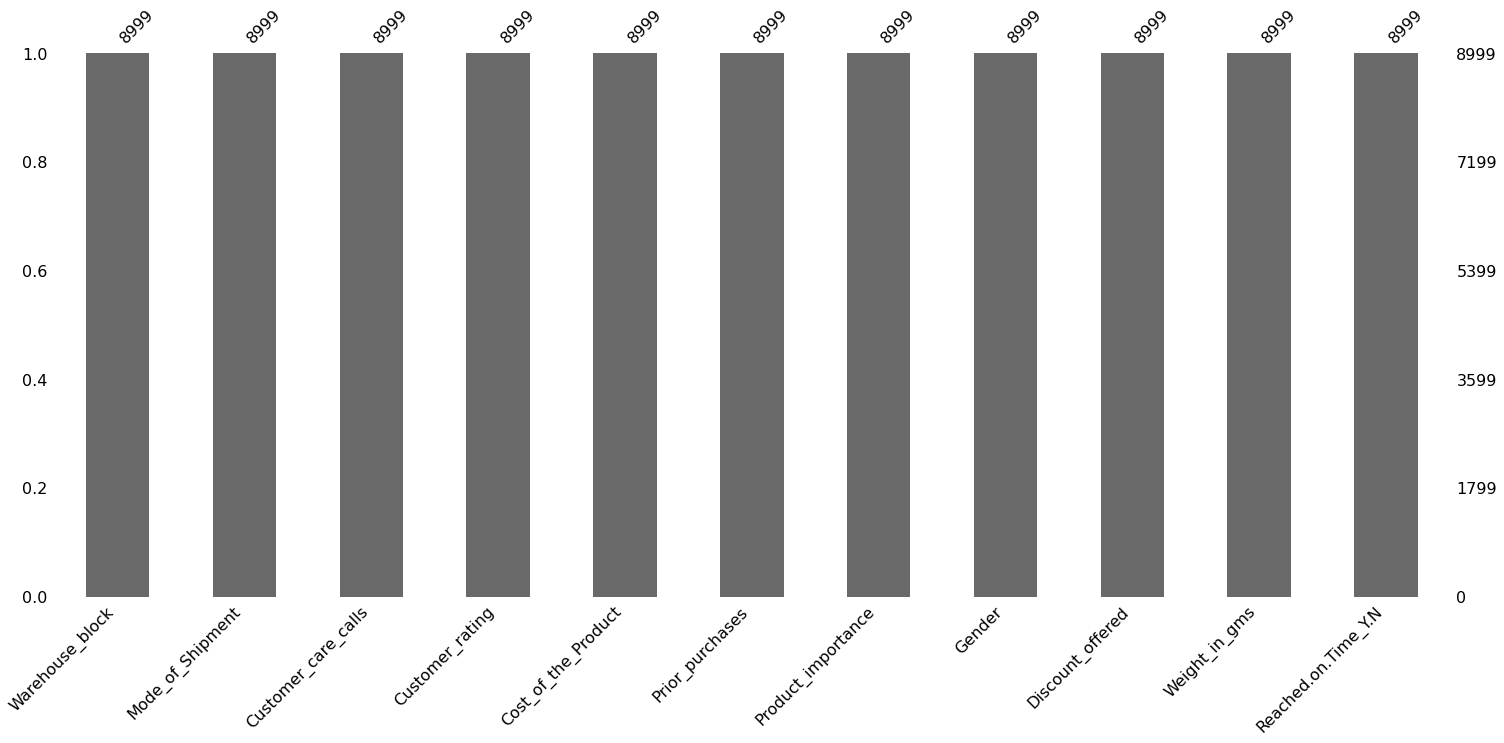

In [10]:
#Observamos que las variables no cuentan con datos nulos
msno.bar(DF)
plt.show()

Observemos en busqueda de outliers en cada una de las variables:

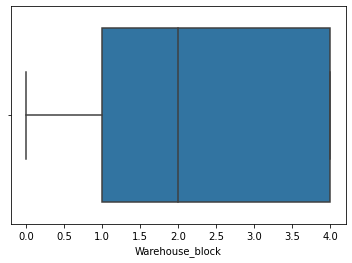

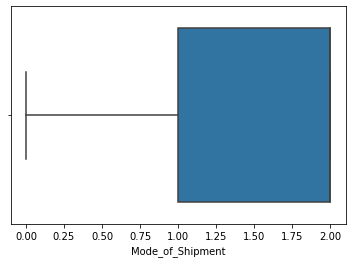

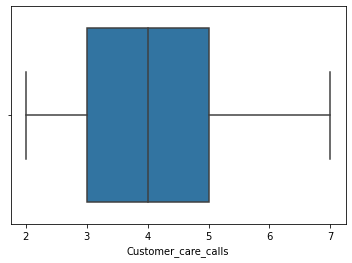

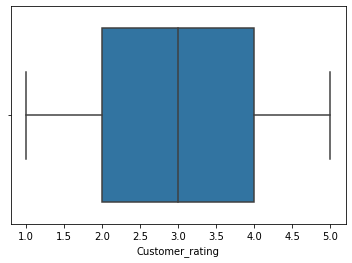

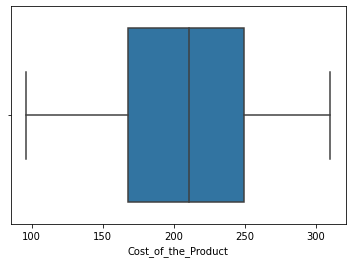

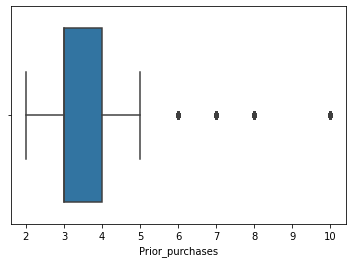

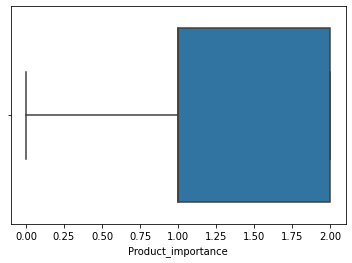

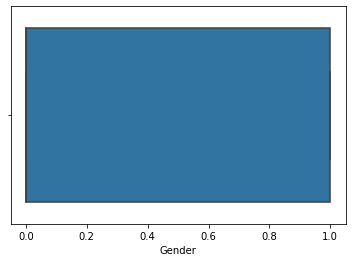

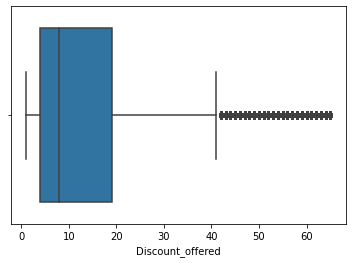

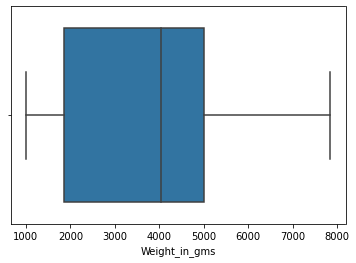

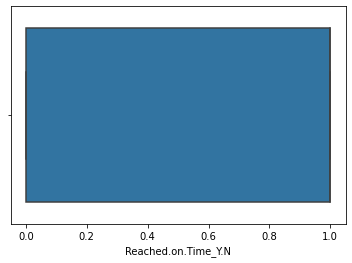

In [13]:
for i in DF.columns.values:
    sns.boxplot(x = i, data = DF)
    plt.show()

Vamos a proceder a sacar los outliers de las columnas Discount_offered y Prior_purchases:

In [14]:
Q1 = DF['Discount_offered'].quantile(0.25)
Q3 = DF['Discount_offered'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR

print(Q1)
print(Q3)
print(IQR)
print(BI)
print(BS)

4.0
19.0
15.0
-18.5
41.5


In [15]:
print('Cantidad de registros totales:', DF.shape[0])
print('Cantidad de outliers:', DF[(DF['Discount_offered']<BI) | (DF['Discount_offered']>BS)].shape[0] )

Cantidad de registros totales: 8999
Cantidad de outliers: 1193


In [16]:
out_Discount = (DF['Discount_offered']<BI) | (DF['Discount_offered']>BS) 

DF = DF[~out_Discount]

In [17]:
DF.shape

(7806, 11)

In [18]:
Q1 = DF['Prior_purchases'].quantile(0.25)
Q3 = DF['Prior_purchases'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR

print(Q1)
print(Q3)
print(IQR)
print(BI)
print(BS)

3.0
4.0
1.0
1.5
5.5


In [19]:
print('Cantidad de registros totales:', DF.shape[0])
print('Cantidad de outliers:', DF[(DF['Prior_purchases']<BI) | (DF['Prior_purchases']>BS)].shape[0] )

Cantidad de registros totales: 7806
Cantidad de outliers: 702


In [20]:
out_Prior = (DF['Prior_purchases']<BI) | (DF['Prior_purchases']>BS) 

DF = DF[~out_Prior]

In [21]:
DF.shape

(7104, 11)

Ahora veamos como quedaron sin los outliers:

<AxesSubplot:xlabel='Discount_offered'>

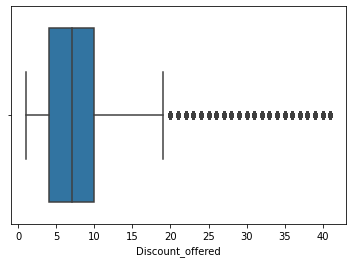

In [22]:
sns.boxplot(x = 'Discount_offered', data = DF)

<AxesSubplot:xlabel='Prior_purchases'>

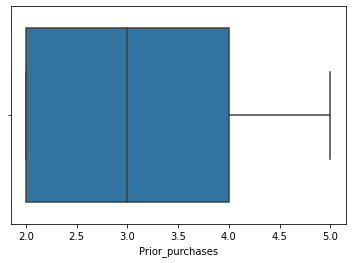

In [23]:
sns.boxplot(x = 'Prior_purchases', data = DF)

Se realiza una una visualizacion de las correlaciones entre nuestras variables, para evaluar el descarte de variables altamente correlacionadas

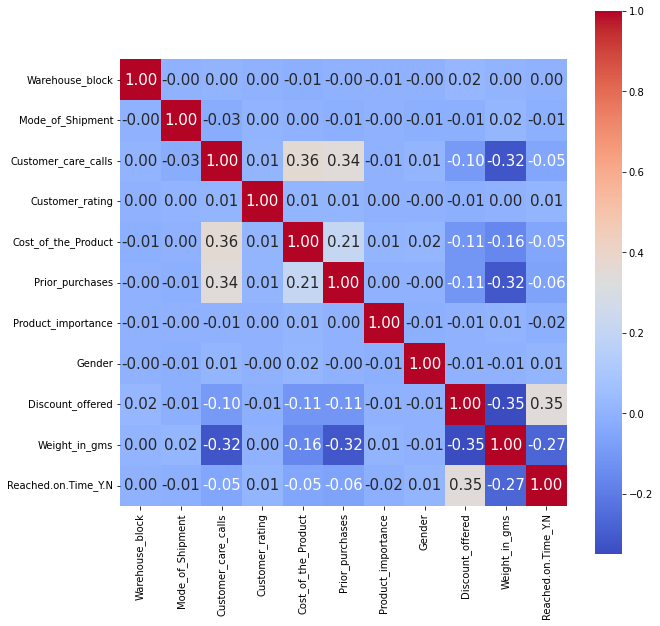

In [24]:
corr = DF.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= DF.columns, 
           yticklabels= DF.columns,
           cmap= 'coolwarm')
plt.show()

Con nuestras variables sin mas anormalidades importantes detectadas hasta el momento observaremos su distribucion.

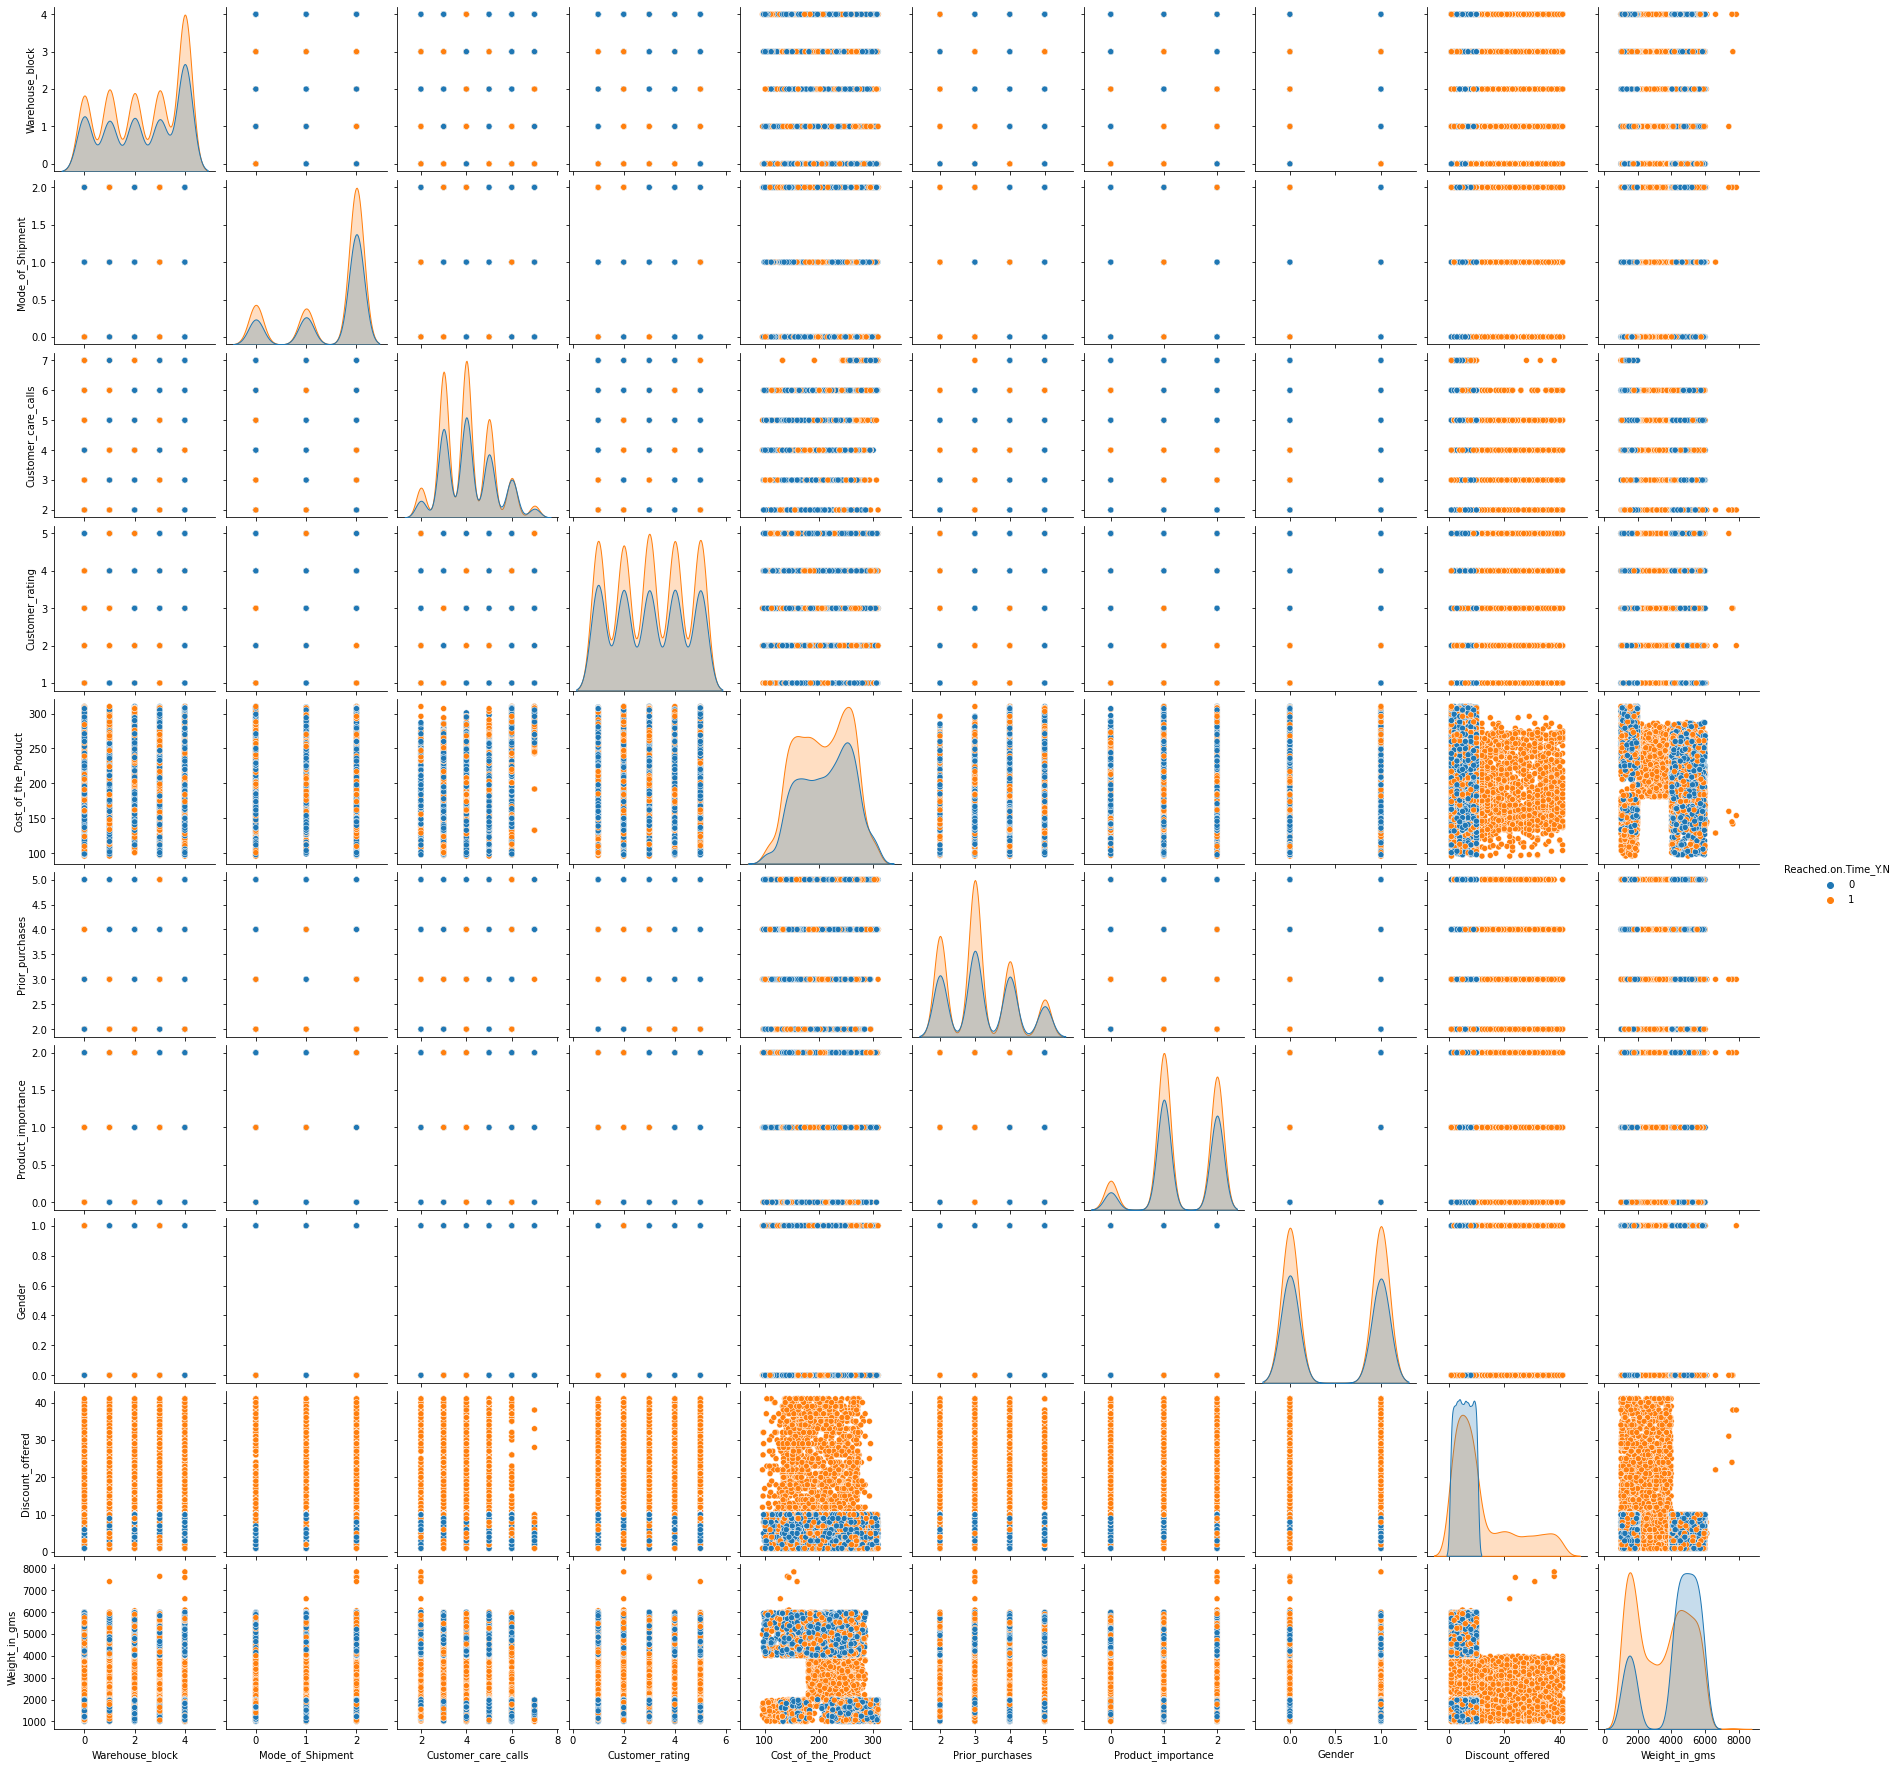

In [25]:
sns.pairplot(DF, hue="Reached.on.Time_Y.N")
plt.show()

No esta de mas tener una idea de como es la proporcion de envios satisfactorios y no satisfactorios, por lo que podemos tomar conciencia que tanto cumple la empresa con sus clientes en sus envios

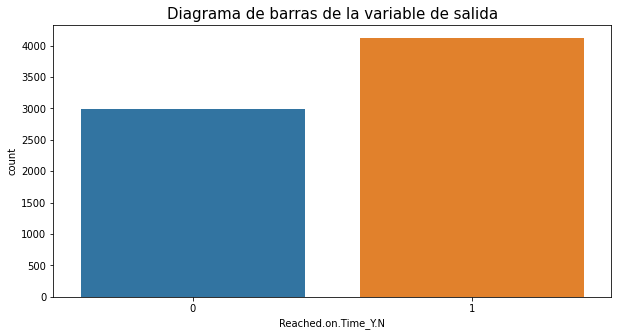

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Reached.on.Time_Y.N' ,label= 'Count', data = DF)
plt.title('Diagrama de barras de la variable de salida', fontsize = 15)
plt.show()

Realizamos un escalado de los datos. Esto se debe a que K-NN trabaja con distancias y no puede discernir la diferencia de escala y unidades entre cada una de las variables.

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

scaler.fit(DF[['Discount_offered','Weight_in_gms','Prior_purchases','Customer_care_calls','Customer_rating','Cost_of_the_Product']])

DF[['Discount_offered','Weight_in_gms','Prior_purchases','Customer_care_calls','Customer_rating','Cost_of_the_Product']] = scaler.transform(DF[['Discount_offered','Weight_in_gms','Prior_purchases','Customer_care_calls','Customer_rating','Cost_of_the_Product']])

Con este analisis exploratorio de los datos nos queda definir nuestras variables predictoras y la variable objetivo.
La variable objetivo es y = Reached.on.Time_Y.N.
Las variables predictoras seleccionadas personalmente al obserbar sus distribuciones seran: 'Discount_offered','Weight_in_gms','Prior_purchases','Customer_care_calls','Customer_rating','Cost_of_the_Product'

In [30]:
X = DF[['Discount_offered','Weight_in_gms','Prior_purchases','Customer_care_calls','Customer_rating','Cost_of_the_Product']]
y = DF['Reached.on.Time_Y.N']

In [31]:
y.sum()/y.count()

0.579954954954955

El modelo que elijo en este caso sera el de vecinos mas cercanos ya que noto acumulacion en ciertos lugares de cada una de las variables seleccionadas pero sin identificar un patron lineal o algun patron estandar facil de identificar.

Procedemos a crear un conjunto de test y un conjuto de train de la siguiente manera:

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [33]:
print('Proporción de etiquetas en set de entrenamiento:', y_train.sum()/y_train.count())
print('Proporción de etiquetas en set de testeo:', y_test.sum()/y_test.count())

Proporción de etiquetas en set de entrenamiento: 0.5814171750351947
Proporción de etiquetas en set de testeo: 0.5668073136427567


Instanciamos el modelos de vecinos mas cercanos

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
# Predecimos sobre nuestro set de entrenamiento

y_train_pred = knn.predict(X_train)

# Predecimos sobre nuestro set de test

y_test_pred = knn.predict(X_test)

# Comparamos con las etiquetas reales

print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

Accuracy sobre conjunto de Train: 1.0
Accuracy sobre conjunto de Test: 0.6272855133614628


Calculamos el Recall

In [37]:
from sklearn.metrics import recall_score

precision = recall_score(y_test, y_test_pred)
print(precision)

0.6823821339950372


Ya con nuestro modelo creado vamos a usar el archivo de test para generar nuestras predicciones para el formulario

In [40]:
dfPrueba = pd.read_excel('E-Commerce_test.xlsx', index_col='ID')
dfPrueba

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
ID,,,,,,,,,,
9000,F,Ship,5,1,189,2,medium,M,10,5248
9001,D,Ship,5,3,150,2,high,F,9,4446
9002,F,Ship,3,3,200,3,low,M,3,5739
9003,A,Ship,5,1,133,2,medium,M,1,4643
9004,B,Ship,4,2,260,3,low,M,4,5504
...,...,...,...,...,...,...,...,...,...,...
10995,A,Ship,4,1,252,5,medium,F,1,1538
10996,B,Ship,4,1,232,5,medium,F,6,1247
10997,C,Ship,5,4,242,5,low,F,4,1155


In [41]:
from sklearn.preprocessing import LabelEncoder
for col in dfPrueba.columns:
  if(dfPrueba[col].dtype == 'object'):
      le=LabelEncoder()
      dfPrueba[col]=le.fit_transform(dfPrueba[col])

In [42]:
scl = StandardScaler()

scl.fit(dfPrueba[['Discount_offered','Weight_in_gms','Prior_purchases','Customer_care_calls','Customer_rating','Cost_of_the_Product']])

dfPrueba[['Discount_offered','Weight_in_gms','Prior_purchases','Customer_care_calls','Customer_rating','Cost_of_the_Product']] = scaler.transform(dfPrueba[['Discount_offered','Weight_in_gms','Prior_purchases','Customer_care_calls','Customer_rating','Cost_of_the_Product']])

In [43]:
X1 = dfPrueba[['Discount_offered','Weight_in_gms','Prior_purchases','Customer_care_calls','Customer_rating','Cost_of_the_Product']]

In [44]:
y1_test_pred = knn.predict(X1)

In [45]:
archivo = pd.DataFrame(y1_test_pred, columns = ['pred'])

archivo.to_csv('rodrigoalvarezruiz(3).csv', index = False)

In [46]:
archivo.shape

(2000, 1)